# A.2.3 The LBM Code (D2Q4)

In [3]:
# LBM Code for 2-D , Advection-diffusion problems, D2Q4

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

n = 100
m = 100
f1 = np.zeros((n+1,m+1),dtype=float)
f2 = np.zeros((n+1,m+1),dtype=float)
f3 = np.zeros((n+1,m+1),dtype=float)
f4 = np.zeros((n+1,m+1),dtype=float)

rho = np.zeros((n+1,m+1),dtype=float)
x = np.zeros(n+1,dtype=float)
y = np.zeros(m+1,dtype=float)

u = 0.1
v = 0.2
dx = 1.0
dy = 1.0
dt = 1.0
for i in range(1,n+1):
    x[i] = x[i-1] + dx
for i in range(1,m+1):
    y[i] = y[i-1] + dy
    
ck = dx/dt
csq = ck*ck
alpha = 1.0
omega = 1.0/(2.0*alpha/(dt*csq) + 0.5)
mstep = 200


# main loop
for kk in range(i, mstep+1):
    for j in range(0,m+1):
        for i in range(0,n+1):
            feq1 = 0.25*rho[i,j]*(1.0 + 2.0*u/ck)
            feq2 = 0.25*rho[i,j]*(1.0 - 2.0*u/ck)
            feq3 = 0.25*rho[i,j]*(1.0 + 2.0*v/ck)
            feq4 = 0.25*rho[i,j]*(1.0 - 2.0*v/ck)
            
            f1[i,j] = omega*feq1 + (1.0-omega)*f1[i,j]
            f2[i,j] = omega*feq2 + (1.0-omega)*f2[i,j]
            f3[i,j] = omega*feq3 + (1.0-omega)*f3[i,j]
            f4[i,j] = omega*feq4 + (1.0-omega)*f4[i,j]
    
    for j in range(0,m+1):
        for i in range(1,n+1):
            f1[n-i,j] = f1[n-i-1,j]
            f2[i-1,j] = f2[i,j]
            
    for i in range(0,n+1):
        for j in range(1,m+1):
            f3[i,m-j] = f3[i,m-j-1]
            f4[i,j] = f4[i,j-1]
            
    # boundary condition
    for j in range(1,m+1):
        f1[0,j] = 0.5 - f2[0,j]
        f3[0,j] = 0.5 - f4[0,j]
        f1[n,j] = f1[n-1,j]
        f2[n,j] = f2[n-1,j]
        f3[n,j] = f3[n-1,j]
        f4[n,j] = f4[n-1,j]
        
    for i in range(1,n+1):
        f1[i,m] = 0.0
        f2[i,m] = 0.0
        f3[i,m] = 0.0
        f4[i,m] = 0.0
        f1[i,0] = f1[i,1]
        f2[i,0] = f2[i,1]
        f3[i,0] = f3[i,1]
        f4[i,0] = f4[i,1]
        
    for j in range(0,m+1):
        for i in range(0,n+1):
            rho[i,j] = f1[i,j] + f2[i,j] + f3[i,j] + f4[i,j]
# end of main loop

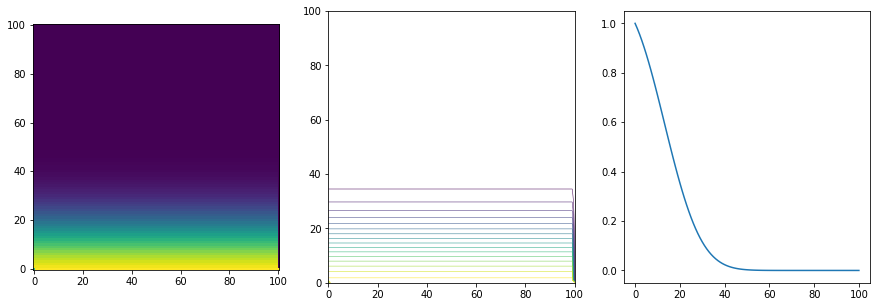

In [46]:
temp = rho[:,50]
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.plot(temp)

plt.subplot(132)
plt.contour(rho,16,linewidths=0.5)

plt.subplot(1, 3, 1)
plt.imshow(rho, interpolation='nearest', origin='lower')

plt.show()

# A.2.4 The FDM Code (2-D)

In [49]:
# Finite Difference Code for 2-D, Advection-diffusion problems

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

n = 100
m = 100
f0 = np.zeros((n+1,m+1), dtype=float)
f = np.zeros((n+1,m+1), dtype=float)
x = np.zeros(n+1, dtype=float)
y = np.zeros(m+1, dtype=float)

# initial condition
dx = 1.0
dt = 0.2
dy = 1.0
time = 0.0
u = 0.1
v = 0.2
alpha = 1.0
mstep = 1000

for j in range(0,m+1):
    f0[0,j] = 1.0
    f[0,j] = 1.0
    
for i in range(0,n+1):
    f0[i,m] = 0.0
    f[i,m] = 0.0
    
for kk in range(1,mstep+1):
    for j in range(1,m):
        for i in range(1,n):
            termx = (f0[i+1,j] + f0[i-1,j]) / (dx*dx)
            termy = (f0[i,j+1] + f0[i,j-1]) / (dy*dy)
            dd = 1.0/(dx*dx) + 1.0/(dy*dy)
            advx = u*(f0[i,j] - f0[i-1,j]) / dx
            advy = v*(f0[i,j] - f0[i,j-1]) / dy
            advt = dt*(advx + advy)
            f[i,j] = f0[i,j] + dt*alpha*(termx+termy-2.0*f0[i,j]*dd) -advt
            
    # boundary condition
    for j in range(1,m):
        for i in range(1,n):
            f0[i,j] = f[i,j]
            
    # adiabatic bottom boundary
    for i in range(0,n+1):
        f0[i,0] = f0[i,1]
        f[i,0] = f[i,1]
        
    # adiabatic right boundary
    for j in range(0,m+1):
        f0[n,j] = 0.0
        f[n,j] = 0.0
    
    time = time + dt          

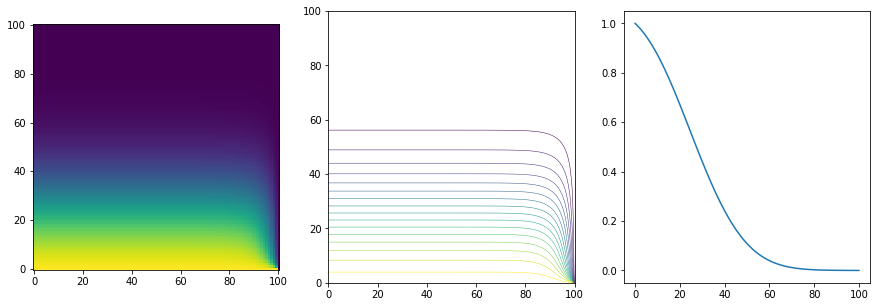

In [50]:
temp = f[:,50]
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.plot(temp)

plt.subplot(132)
plt.contour(f,16,linewidths=0.5)

plt.subplot(1, 3, 1)
plt.imshow(f, interpolation='nearest', origin='lower')

plt.show()